<a href="https://colab.research.google.com/github/monalisapatra26/ML4Science/blob/main/Deep%20Learning/Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

The input_shape specifies the parameter (time_steps $\times$ features)

If we have m hidden units (m=2 in the above case), then:

1. Input: $x~\varepsilon~$R
2. Hidden unit: $h~\varepsilon$ R$^m$
3. Weights for the input units: $w_x~\varepsilon$ R$^{m}$
4. Weights for the hidden units: $w_h~\varepsilon$ R$^{m\times m}$
5. Bias for the hidden units:   $b_h~\varepsilon$ R$^{m}$
6. Weight for the dense layer: $w_y~\varepsilon$ R$^{m}$
7. Bias for the dense layer: $b_y~\varepsilon$ R

In [ ]:
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[-1.236486  -0.5567393]]  wh =  [[-0.4131937   0.9106432 ]
 [ 0.9106432   0.41319358]]  bh =  [0. 0.]  wy = [[0.7641052]
 [0.701022 ]] by =  [0.]


<img src="https://machinelearningmastery.com/wp-content/uploads/2021/09/rnnCode1.png"/>

In [ ]:
x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)


m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by

print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)

print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o3)

1/1 [==============================] - 1s 567ms/step
h1 =  [[-1.23648596 -0.55673927]] h2 =  [[-2.46905455 -2.46951719]] h3 =  [[-4.93810917 -4.93903425]]
Prediction from network  [[-7.235607]]
Prediction from our computation  [[-7.23560671]]


# Running the RNN on a dataset

1. Read the dataset from a given URL
2. Split the data into training and test sets
3. Prepare the input to the required Keras format
4. Create an RNN model and train it
5. Make the predictions on training and test sets and print the root mean square error on both sets
6. View the result

##  Reading Data and Splitting Into Train and Test

Our data returns single-dimensional arrays for train and test data after scaling the data between 0 and 1 using MinMaxScaler from scikit-learn.

In [ ]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

## Reshaping the data for Keras

The input array should be shaped as: total_samples x time_steps x features.

There are many ways of preparing time series data for training. We’ll create input rows with non-overlapping time steps. An example for time steps = 2 is shown in the figure below. Here, time steps denotes the number of previous time steps to use for predicting the next value of the time series data.

<img src = "https://machinelearningmastery.com/wp-content/uploads/2021/09/rnnCode2-1024x543.png"/>

In [ ]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

## Create the RNN model and Train

In [ ]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 1s - loss: 0.0224 - 1s/epoch - 7ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0110 - 344ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0079 - 400ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0065 - 473ms/epoch - 3ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0055 - 378ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0051 - 416ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0047 - 358ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0044 - 458ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0042 - 472ms/epoch - 3ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0041 - 419ms/epoch - 2ms/step
Epoch 11/20
187/187 - 1s - loss: 0.0040 - 501ms/epoch - 3ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0039 - 475ms/epoch - 3ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0039 - 402ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0037 - 409ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0038 - 351ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0.00

## Compute and Print the Root Mean Square Error

In [ ]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 3ms/step
Train RMSE: 0.058 RMSE
Test RMSE: 0.088 RMSE


## Viewing the results

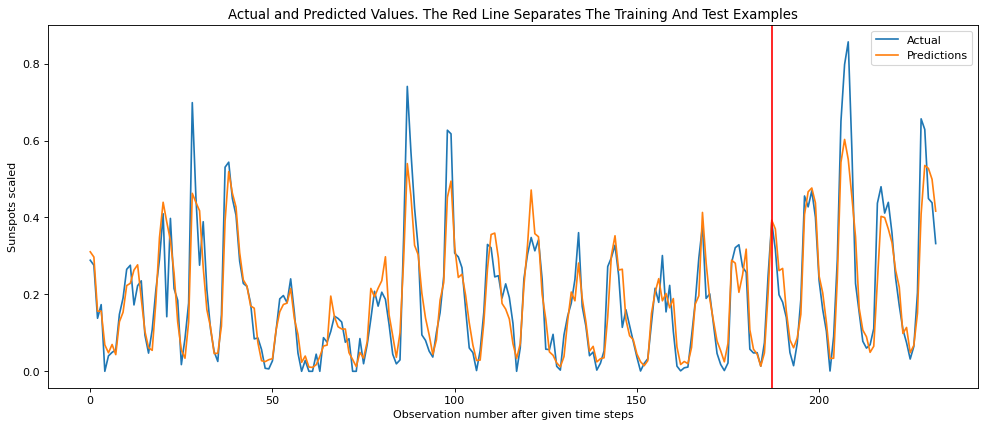

In [ ]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
5*5 + 5*1 + 5

35

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*40KFPgVLs3o7JNKm_q3oWA.png"/>

In [ ]:
3*3 + 3*1 +3

15